In [2]:
from pymatreader import read_mat

phantom_img = read_mat('data/phantom/phantom_Img.mat')
phantom_img.keys()

dict_keys(['img'])

In [3]:
import numpy as np

phantom_img = np.array(phantom_img['img'])
phantom_img.shape

(374, 128, 10)

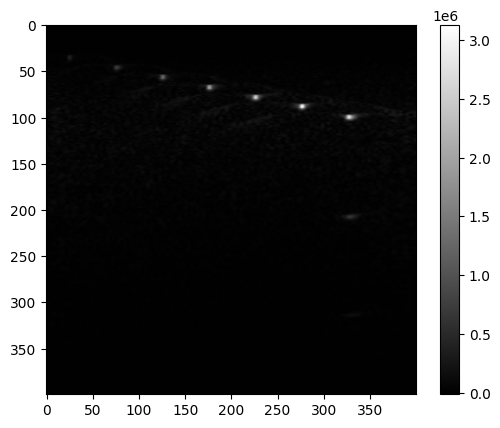

In [4]:
import matplotlib.pyplot as plt

import scipy.ndimage

def scan_convertion(image, target_size):
    return scipy.ndimage.zoom(image, (target_size[0] / image.shape[0], target_size[1] / image.shape[1]))
converted_phantom_img = scan_convertion(phantom_img[:,:,0], (400, 400))

plt.imshow(converted_phantom_img, cmap='gray')
plt.colorbar()
plt.show()

In [5]:
phantom_rfdata = read_mat('data/phantom/phantom_rfdata.mat')
phantom_rfdata.keys()

dict_keys(['rfdata'])

In [6]:
phantom_rfdata = np.array(phantom_rfdata['rfdata'])
phantom_rfdata.shape

(2176, 128, 100)

In [7]:
phantom_rfdata[:,:,0].shape

(2176, 128)

In [8]:
element = 128
col_pixel = 128
row_pixel = 2048 #(> 1580)

In [9]:
col_spacing = 0.3e-3 # 0.3 mm
row_spacing = 0.04/row_pixel

In [25]:
row_spacing

1.953125e-05

In [10]:
distance = np.zeros((element, row_pixel, col_pixel))
distance.shape

(128, 2048, 128)

In [11]:
for ele in range(element):
    for row in range(row_pixel):
        if row == 0:
            distance[ele][row][ele] = row_spacing / 2
        else:
            distance[ele][row][ele] = distance[ele][row-1][ele] + row_spacing

In [12]:
for ele in range(element):
    for row in range(row_pixel):
        for col in range(ele+1, col_pixel):
            distance[ele][row][col] = np.sqrt((np.abs(ele - col) * col_spacing)**2 + distance[ele][row][ele]**2)
        for col in range(ele-1, -1, -1):
            distance[ele][row][col] = np.sqrt((np.abs(ele - col) * col_spacing)**2 + distance[ele][row][ele]**2)


In [13]:
distance

array([[[9.76562500e-06, 3.00158904e-04, 6.00079468e-04, ...,
         3.75000013e-02, 3.78000013e-02, 3.81000013e-02],
        [2.92968750e-05, 3.01427117e-04, 6.00714830e-04, ...,
         3.75000114e-02, 3.78000114e-02, 3.81000113e-02],
        [4.88281250e-05, 3.03947669e-04, 6.01983543e-04, ...,
         3.75000318e-02, 3.78000315e-02, 3.81000313e-02],
        ...,
        [3.99511719e-02, 3.99522982e-02, 3.99556771e-02, ...,
         5.47936687e-02, 5.49994194e-02, 5.52060335e-02],
        [3.99707031e-02, 3.99718289e-02, 3.99752062e-02, ...,
         5.48079110e-02, 5.50136084e-02, 5.52201694e-02],
        [3.99902344e-02, 3.99913596e-02, 3.99947352e-02, ...,
         5.48221565e-02, 5.50278007e-02, 5.52343086e-02]],

       [[3.00158904e-04, 9.76562500e-06, 3.00158904e-04, ...,
         3.72000013e-02, 3.75000013e-02, 3.78000013e-02],
        [3.01427117e-04, 2.92968750e-05, 3.01427117e-04, ...,
         3.72000115e-02, 3.75000114e-02, 3.78000114e-02],
        [3.03947669e-04, 

In [14]:
sound_speed_p = 1450 # m/s
center_freq = 7.6e6 # Hz
sampling_rate = 4.1
sampling_freq = center_freq * sampling_rate # 31.16 MHz

In [15]:
delay = np.zeros((element, row_pixel, col_pixel))

In [16]:
n = 30
th = np.deg2rad(n)
np.cos(th)
# max_l = np.sqrt(3) / np.cos(th)
# max_l
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 512)
s.sort()
s = s[s > 0][::-1]

In [17]:
for ele in range(element):
    for row in range(row_pixel):
        d = (row_spacing / 2) + (row * row_spacing) # distance from element to pixel_row
        if th == 180:
            max_l = np.inf
        else:
            max_l = d / np.cos(th/2)
        for col in range(col_pixel):
            l = distance[ele][row][col] # distance from element to pixel
            if max_l < l:
                delay[ele][row][col] = -1
            else:
                delay[ele][row][col] = ((d + l) / sound_speed_p) * sampling_freq

In [18]:
delay

array([[[ 4.19719828e-01, -1.00000000e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [ 1.25915948e+00, -1.00000000e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [ 2.09859914e+00, -1.00000000e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        ...,
        [ 1.71707381e+03,  1.71709802e+03,  1.71717063e+03, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [ 1.71791325e+03,  1.71793745e+03,  1.71801002e+03, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [ 1.71875269e+03,  1.71877688e+03,  1.71884942e+03, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00]],

       [[-1.00000000e+00,  4.19719828e-01, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00],
        [-1.00000000e+00,  1.25915948e+00, -1.00000000e+00, ...,
         -1.00000000e+00, -1.00000000e

In [19]:
def cal_weight(p):
    i = int(p)
    f = p - i
    return (1-f, f)

In [20]:
pixel = np.zeros((row_pixel, col_pixel))
pixel.shape

(2048, 128)

In [21]:
for row in range(row_pixel):
    for col in range(col_pixel):
        s = np.random.normal(mu, sigma, 512)    # element weight
        s.sort()
        s = s[s > 0][::-1]
        for ele in range(element):
            if delay[ele][row][col] == -1:
                continue
            p = delay[ele][row][col]
            a, b = phantom_rfdata[:,:,0][int(p)][ele], phantom_rfdata[:,:,0][int(p) + 1][ele]
            a_w, b_w = cal_weight(p)
            pixel[row][col] += (a * a_w + b * b_w)*s[np.abs(ele - col)]

In [26]:
pixel

array([[-146.44906582, -210.95765447, -157.08211398, ..., -136.57339771,
        -101.25360377,  -95.46037835],
       [-183.836551  , -209.66922539, -130.95630399, ..., -136.56467985,
        -208.66729691, -102.33975755],
       [ -15.16791818,   73.1912804 ,   33.9532812 , ...,   33.38649264,
         -76.44017081,  -26.76647897],
       ...,
       [   0.55750165,   -4.57950948,  124.69350102, ...,  -75.6455895 ,
        -100.15335101,  -15.09054167],
       [ -38.03582917,  -71.52937195,   13.97156684, ..., -100.21949327,
         -34.36895132,  -20.60424073],
       [ -62.25630365,  -80.91470345,  -89.51901899, ...,  -15.20923889,
          51.50164763,  -19.09653033]])

In [22]:
from scipy.signal import hilbert

pixel_hilbert = np.abs(hilbert(pixel, axis=0))

In [23]:
log_pixel_hilbert = 20 * np.log10(pixel_hilbert)


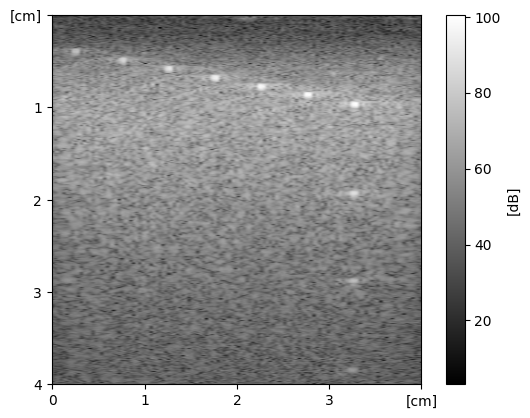

In [24]:
import scipy.ndimage

def scan_convertion(image, target_size):
    return scipy.ndimage.zoom(image, (target_size[0] / image.shape[0], target_size[1] / image.shape[1]))
# Define the target size
target_size = (400, 400)

# Perform scan conversion
scan_converted_image = scan_convertion(log_pixel_hilbert, target_size)

# Display the scan converted image
plt.imshow(scan_converted_image, cmap='gray')
plt.xticks(np.arange(0, 401, 100), labels=['0', '1', '2', '3', '[cm]'])
plt.yticks(np.arange(0, 401, 100), labels=['[cm]', '1', '2', '3', '4'])
plt.colorbar(label='[dB]')
plt.show()